This notebook does sentiment analysis via Huggingface pipeline.
<mark>Don't loop through individual data in Python, do it with Numpy dataframe since the subroutines are in C++</mark>

# Read in datasets

In [21]:
from transformers import pipeline

# https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment
MODEL1 = "cardiffnlp/twitter-roberta-base-sentiment"
# https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion?text=I+feel+a+bit+let+down
MODEL2 = "bhadresh-savani/distilbert-base-uncased-emotion"

pipe1 = pipeline(model=MODEL1)
pipe2 = pipeline(model=MODEL2)

Downloading:   0%|          | 0.00/2.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/768 [00:00<?, ?B/s]

C:\Users\mktsu\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mktsu\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/9.98k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [116]:
import pandas as pd
from sklearn.utils import shuffle

# Read in Kaggle titles only. The dataframe df_kaggle has two columns: article titles, and (true/false).
kaggle_df_true = pd.read_csv('./kaggle_dataset/True.csv', usecols = [0])
kaggle_df_fake = pd.read_csv('./kaggle_dataset/Fake.csv', usecols = [0])


In [154]:
corpus_true = shuffle(kaggle_df_true.loc[:,'title'].tolist())
corpus_fake = shuffle(kaggle_df_fake.loc[:,'title'].tolist())

In [118]:
# TRUE NEWS

print("Labels 0 -, 1 n, 2 +\n")

for i in range(100):
    print(corpus_true[i], "\n", \
          "Label", \
          (pipe1(corpus_true[i]))[0]["label"][-1], \
          "\b,",
          round((pipe1(corpus_true[i]))[0]["score"],2), \
          "\b;  ", \
         (pipe2(corpus_true[i]))[0]["label"], \
          round((pipe1(corpus_true[i]))[0]["score"],2))


Labels 0 -, 1 n, 2 +

Two dead in Gaza blast, Israeli military denies it carried out an attack 
 Label 0, 0.79;   fear 0.79
U.S. business group worries Trump unprepared for commercial talks with China 
 Label 0, 0.6;   fear 0.6
Women in Asia-Pacific express dismay over U.S. presidential campaign 
 Label 0, 0.69;   anger 0.69
Self-designed homes could provide sustainable future for liberated Mosul 
 Label 2, 0.74;   joy 0.74
U.S., Nordic nations call on Russia's military to comply with obligations  
 Label 1, 0.86;   anger 0.86
EPA waives requirements on sale, production of gasoline due to storms 
 Label 1, 0.83;   fear 0.83
U.S. follows Mexico in backing disputed Honduran vote result 
 Label 1, 0.89;   fear 0.89
New Turkish party could cost Erdogan support, dislodge main opposition: poll 
 Label 0, 0.59;   anger 0.59
Democrats want strong response to intel report on 2016 election 
 Label 1, 0.78;   joy 0.78
Factbox: Short list of potential Trump administration picks 
 Label 1, 0.88;   

Head of Russian general staff reassures NATO over war games: RIA 
 Label 1, 0.88;   joy 0.88
China's Xi says will persist with Korean peninsula denuclearization 
 Label 1, 0.82;   anger 0.82
Israel disappointed at Trump's decision not to move U.S. embassy 
 Label 0, 0.75;   sadness 0.75
House Speaker Ryan blasts Democrats' proposal for 3-month debt limit increase 
 Label 1, 0.76;   anger 0.76
Turkey's Erdogan says U.S. courts cannot put Turkey on trial 
 Label 0, 0.53;   anger 0.53
Youngstown, Ohio, mayor gets probation in corruption plea deal 
 Label 1, 0.77;   anger 0.77
Exclusive: Trump names career diplomat to head Cuban embassy - sources 
 Label 1, 0.9;   joy 0.9
Erdogan, Trump agree joint action against Islamic State in Syria: Turkish sources 
 Label 1, 0.88;   anger 0.88
House oversight panel chair: Sessions should 'clarify his testimony' 
 Label 1, 0.86;   anger 0.86
Russia accuses U.S. of trying to provoke North Korean leader 'to fly off handle' 
 Label 0, 0.53;   anger 0.53
H

In [119]:
# FAKE NEWS

print("Labels 0 -, 1 n, 2 +\n")

for i in range(100):
    print(corpus_fake[i], "\n", \
          "Label", \
          (pipe1(corpus_fake[i]))[0]["label"][-1], \
          "\b,",
          round((pipe1(corpus_fake[i]))[0]["score"],2), \
          "\b;  ", \
         (pipe2(corpus_true[i]))[0]["label"], \
          round((pipe1(corpus_fake[i]))[0]["score"],2))


Labels 0 -, 1 n, 2 +

33-Yr Old Skier LINDSEY VONN Says She Won’t Represent President Trump At Upcoming Olympics 
 Label 0, 0.55;   fear 0.55
WHILE #UnFitHillary Rests And Parties With Donors…Key Swing State Polls Show Trump’s HARD WORK Is Paying Off 
 Label 1, 0.63;   fear 0.63
 Elizabeth Warren: KKK Supports Trump More Than The Leaders Of His Own Party Do (VIDEO) 
 Label 1, 0.54;   anger 0.54
 Fox News ‘Expert’ Will Now Be A Prison Expert For The Next Three Years 
 Label 0, 0.52;   joy 0.52
CNN’S FAKE NEWS BACKFIRES! CNN Legal Analyst Agrees With Trump On FBI, DOJ: “Off the rails!” [Video] 
 Label 0, 0.56;   anger 0.56
ILLEGAL ALIENS Set Up Huge Tent City…You Won’t Believe Where It Is! [Video] 
 Label 1, 0.47;   fear 0.47
UNPOPULAR HILLARY HOSTS Rally In Empty Charlotte, NC Church…Tiny Room In Toledo, OH…Pops Cough Lozenges…Stretcher Brought Backstage [VIDEO] 
 Label 1, 0.89;   fear 0.89
BUSTED! H.R. McMaster Caught Communicating Internal White House Info with Deep State’s McCabe 
 L

IF JOE BIDEN DECIDES TO RUN FOR PRESIDENT, THIS VIDEO SHOULD BE MANDATORY VIEWING 
 Label 1, 0.68;   anger 0.68
SAY WHAT?! NY PUBLIC School Students Pledge Allegiance To An INTERNATIONAL FLAG? 
 Label 1, 0.49;   anger 0.49
CONSERVATIVE PRO-TRUMP Musician Who Performed In Vegas Moments Before Massacre Exposes More Hollywood Trash: ’I Wasn’t In a Girl Group, I Was in a Prostitution Ring’ 
 Label 0, 0.74;   fear 0.74
 BREAKING: Sworn Affidavit PROVES Clinton ‘Victim’ Wasn’t Assaulted Or Harassed 
 Label 1, 0.72;   anger 0.72
 PA Archbishop Accused Of Using Mafia-Like Tactics Against Lawmaker 
 Label 0, 0.71;   anger 0.71
CNBC DEBATE HACK Proves Allegiance To Democrat Party With This Tweet Celebrating Mass Murder 
 Label 0, 0.72;   anger 0.72
SHAKEDOWN AL SHARPTON MEETS WITH GM TO PRESSURE THEM INTO DROPPING KID ROCK OVER CONFEDERATEF FLAG [Video] 
 Label 1, 0.86;   anger 0.86
 Paul Ryan Forced To Speak On Trump’s Anti-Semitic Tweeting: ‘No Place In A Presidential Campaign’ 
 Label 0, 0.63

In [155]:
# TRUE NEWS, See distribution of scores of each label


n = 200
tx = []
ty = []
tz = []

for i in range(n):
    t = pipe1(corpus_true[i])[0]["label"][-1]
    if t == "0":
        tx.append((pipe1(corpus_true[i]))[0]["score"])
    elif t == "1":
        ty.append((pipe1(corpus_true[i]))[0]["score"])
    else:
        tz.append((pipe1(corpus_true[i]))[0]["score"])

In [150]:
print(tx[0],ty[0])

0.7852251529693604 0.8559021353721619


In [156]:
# FAKE NEWS, See distribution of scores of each label

n = 200
fx = []
fy = []
fz = []

for i in range(n):
    t = pipe1(corpus_fake[i])[0]["label"][-1]
    if t == "0":
        fx.append((pipe1(corpus_fake[i]))[0]["score"])
    elif t == "1":
        fy.append((pipe1(corpus_fake[i]))[0]["score"])
    else:
        fz.append((pipe1(corpus_fake[i]))[0]["score"])

In [152]:
print(fx[0], fy[0])

0.5491359233856201 0.6276236176490784


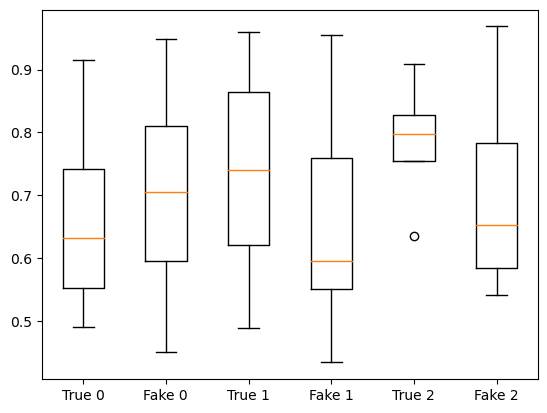

In [157]:
# Visualize scores for true and fake news with their labels
import matplotlib.pyplot as plt
import numpy as np

columns = [tx, fx, ty, fy, tz, fz]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3, 4, 5, 6], ["True 0","Fake 0", "True 1","Fake 1", "True 2","Fake 2"])
plt.show()

We see the scores are most dramatically different 
- Label 1: Very confident in neutral for TRUE news, not so confident for FAKE
- Label 2: Too small of a sample to tell, depends on how we sample our data

In [121]:
n = 1000
x = y = z = 0

for i in range(n):
    t = pipe1(corpus_fake[i])[0]["label"][-1] 
    if t == "0":
        # print(corpus_fake[i], "\n", round((pipe1(corpus_fake[i]))[0]["score"],2))
        x+=1
    elif t == "1":
        y+=1
    else:
        z+=1
print("# Label 0:",x, "; Proportion: ", x/n)
print("# Label 1:",y, "; Proportion: ", y/n)
print("# Label 2:",z, "; Proportion: ", z/n)

# Label 0: 574 ; Proportion:  0.574
# Label 1: 386 ; Proportion:  0.386
# Label 2: 40 ; Proportion:  0.04


# Sentiment analysis via pipeline

In [60]:
sentiment_true = [sent_pipeline(x) for x in corpus_true]

Note that the `joy` factor may not match intuition; for instance, the article
```
WATCH: Colbert HUMILIATES Trump With Scathing Takedown To Avenge Attack On John Dickerson 
```
has Label 0 (negative) with score 0.78 and a joy factor of score 0.78.